## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Your Name : Yeşim Oral

In [76]:
%matplotlib inline

from numpy import *
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


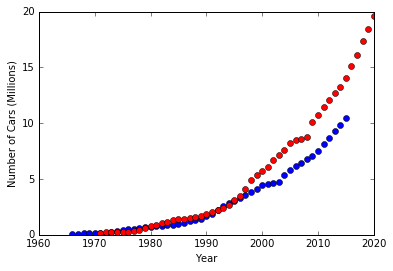

In [75]:
#FOR CAR

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Car[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Cars (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

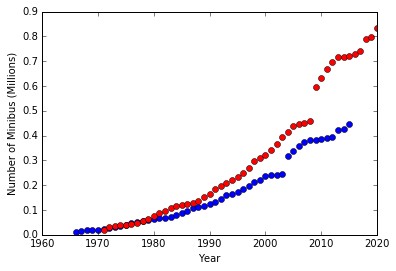

In [80]:
#FOR MINIBUS:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Minibus[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Minibus (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

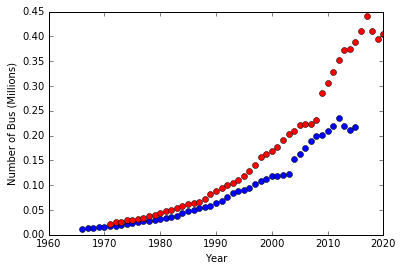

In [81]:
#FOR BUS:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Bus[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Bus (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

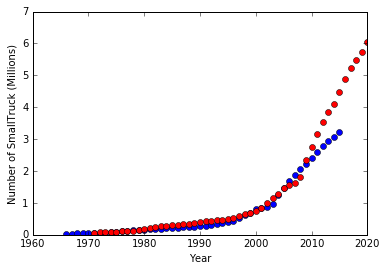

In [83]:
#FOR SMALLTRUCK:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.SmallTruck[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of SmallTruck (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

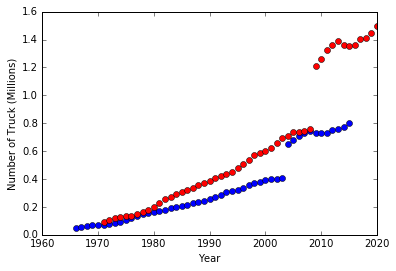

In [84]:
#FOR TRUCK:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Truck[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Truck (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

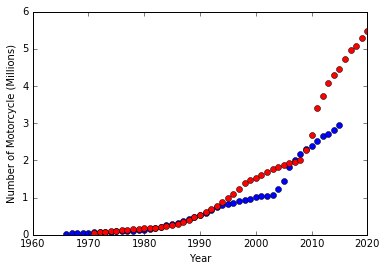

In [85]:
#FOR MOTORCYCLE:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Motorcycle[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Motorcycle (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

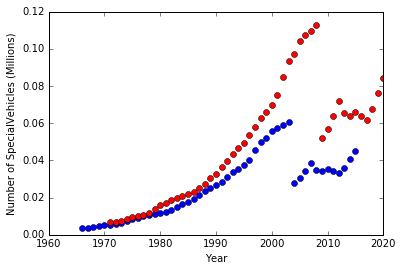

In [86]:
#FOR SPECIALVEHICLES:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.SpecialVehicles[0:].T/1000000)

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of SpecialVehicles (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

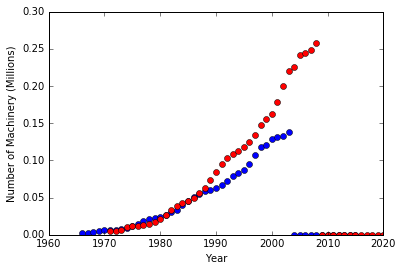

In [97]:
#FOR MACHINERY:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Machinery[0:].T/1000000)


y[np.isnan(y)] = 0

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Machinery (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()

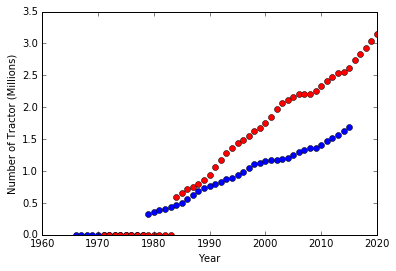

In [98]:
#FOR TRACTOR:

baseYear = 1966
x = np.matrix(df_arac.Year[0:].T -baseYear)
#print x
y = np.matrix(df_arac.Tractor[0:].T/1000000)


y[np.isnan(y)] = 0

N = len(x)
degree = 6

A = np.hstack((np.power(x,i) for i in range(degree + 1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A,y)

#print w_ls

plt.plot(x + baseYear, y, 'bo-')
plt.xlabel('Year')
plt.ylabel('Number of Tractor (Millions)')

targetYear = np.arange(1971,2021)
#targetYear = np.matrix([2016, 2017, 2018, 2019, 2020])

#print targetYear

x_test = np.matrix(targetYear - baseYear)

#print x_test

A2 = np.hstack((np.power(x_test, i) for i in range(degree + 1)))

#print A2
f = A2*w_ls

#print f

plt.plot(x_test+baseYear, f, 'ro-')


plt.show()